# Natural Language Processing

## Exercise Sheet 2

In [ ]:
#imports for all exercises
import nltk

### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


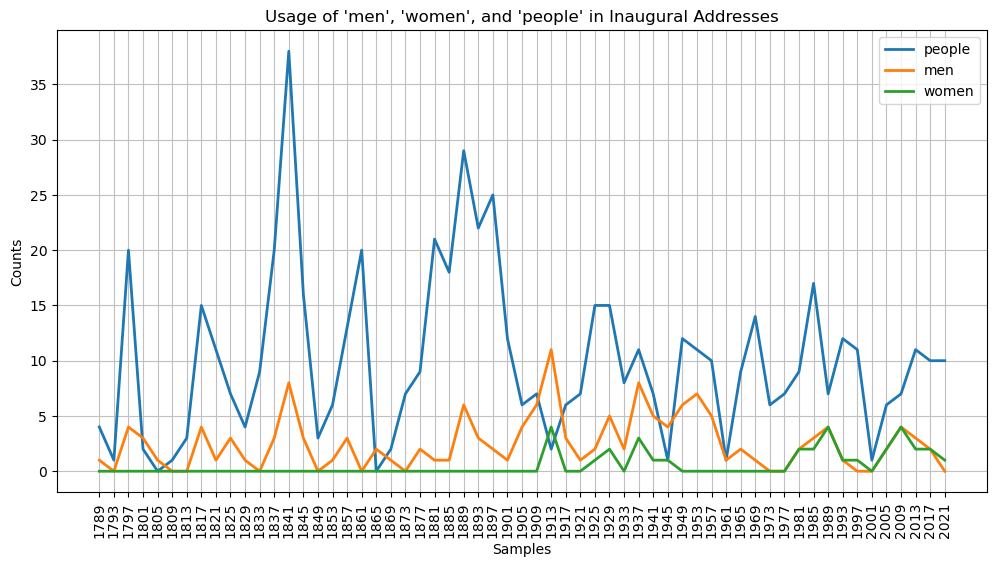

<Axes: title={'center': "Usage of 'men', 'women', and 'people' in Inaugural Addresses"}, xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.corpus import inaugural
import matplotlib.pyplot as plt

# creating a ConditionalFreqDist to track word usage over time

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) # extract the year from the fileid
    for fileid in inaugural.fileids() # get the list of inaugural addresses
    for w in inaugural.words(fileid)
    for target in ["men", "women", "people"] # target words
    if w.lower() == target)

# plotting the conditional frequency distribution
plt.figure(figsize=(12, 6))
cfd.plot(title="Usage of 'men', 'women', and 'people' in Inaugural Addresses")



### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

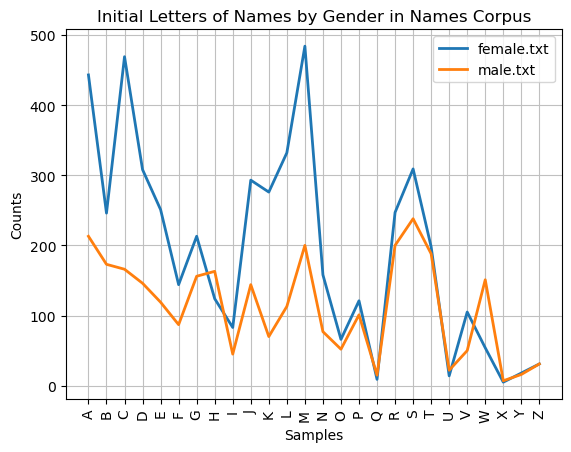

<Axes: title={'center': 'Initial Letters of Names by Gender in Names Corpus'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
names = nltk.corpus.names #loading names corpus
male_names = names.words('male.txt')
female_names = names.words('female.txt')

#conditional frequency distribution for the initial letters of names by gender
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])   #extract the gender and initial letter
    for fileid in names.fileids()
    for name in names.words(fileid))

cfd.plot(title="Initial Letters of Names by Gender in Names Corpus")


### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [ ]:
from nltk.corpus import wordnet as wn

noun_synsets = list(wn.all_synsets('n'))  #all noun synsets

synsets_with_no_hyponyms = sum(not synset.hyponyms() for synset in noun_synsets)  #the number of noun synsets with no hyponyms

percentage_no_hyponyms = (synsets_with_no_hyponyms / len(noun_synsets)) * 100  #the percentage of noun synsets with no hyponyms

print(f"Percentage of noun synsets with no hyponyms: {percentage_no_hyponyms:.2f}%")


Percentage of noun synsets with no hyponyms: 79.67%


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [ ]:
from nltk.corpus import wordnet as wn

def supergloss(synset):

    synset_definition = synset.definition()  #get the definition of the given synset
    hypernyms_definitions = [hypernym.definition() for hypernym in synset.hypernyms()]  #get the definitions of hypernyms
    hyponyms_definitions = [hyponym.definition() for hyponym in synset.hyponyms()]  #get the definitions of hyponyms

    all_definitions = [synset_definition] + hypernyms_definitions + hyponyms_definitions  #concatenate all definitions

    supergloss_text = '\n'.join(all_definitions)  #join the definitions

    return supergloss_text

car_synset = wn.synset("car.n.01")  #get the car.n.01 synset
result = supergloss(car_synset)  #apply the function to the synset

print(result)


a motor vehicle with four wheels; usually propelled by an internal combustion engine
a self-propelled wheeled vehicle that does not run on rails
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a 

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [ ]:
from nltk.corpus import brown

def words_occuring_at_least_n_times(n):
    words = brown.words()  #get the words from the Brown Corpus
    freq_dist = nltk.FreqDist(words)  #create a frequency distribution
    result = [word for word, freq in freq_dist.items()
              if freq >= n and word.isalpha()]  #find words that occur at least n times and filter non-alphabetic words
    return result

n = 200
result_words = words_occuring_at_least_n_times(n)

print(f"Words that occur at least {n} times in the Brown Corpus:")
print(result_words)

Words that occur at least 200 times in the Brown Corpus:
['The', 'said', 'an', 'of', 'no', 'evidence', 'that', 'any', 'took', 'place', 'in', 'the', 'which', 'had', 'and', 'for', 'was', 'been', 'by', 'to', 'possible', 'a', 'such', 'interest', 'number', 'this', 'city', 'it', 'did', 'find', 'many', 'are', 'or', 'often', 'It', 'have', 'these', 'end', 'them', 'on', 'other', 'among', 'well', 'best', 'both', 'two', 'should', 'be', 'cost', 'is', 'as', 'result', 'take', 'problem', 'law', 'also', 'next', 'provide', 'so', 'may', 'at', 'State', 'child', 'This', 'one', 'major', 'general', 'program', 'but', 'has', 'seen', 'through', 'all', 'state', 'with', 'money', 'they', 'might', 'our', 'less', 'we', 'feel', 'future', 'some', 'available', 'do', 'will', 'under', 'its', 'found', 'into', 'These', 'fact', 'effect', 'from', 'new', 'when', 'political', 'not', 'there', 'On', 'night', 'work', 'his', 'wife', 'His', 'They', 'upon', 'age', 'together', 'man', 'more', 'than', 'year', 'home', 'since', 'back', '

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [ ]:
from nltk.corpus import brown

# Calculate and list the lexical diversity scores for all genres
for genre in brown.categories():
    genre_words = brown.words(categories=genre)
    num_words = len(genre_words)
    num_unique_words = len(set(w.lower() for w in genre_words))
    lexical_diversity = num_unique_words / num_words
    print(f"Genre: {genre}, Lexical Diversity: {lexical_diversity:.4f}")


Genre: adventure, Lexical Diversity: 0.1195
Genre: belles_lettres, Lexical Diversity: 0.0985
Genre: editorial, Lexical Diversity: 0.1479
Genre: fiction, Lexical Diversity: 0.1267
Genre: government, Lexical Diversity: 0.1050
Genre: hobbies, Lexical Diversity: 0.1314
Genre: humor, Lexical Diversity: 0.2192
Genre: learned, Lexical Diversity: 0.0851
Genre: lore, Lexical Diversity: 0.1215
Genre: mystery, Lexical Diversity: 0.1131
Genre: news, Lexical Diversity: 0.1304
Genre: religion, Lexical Diversity: 0.1505
Genre: reviews, Lexical Diversity: 0.1982
Genre: romance, Lexical Diversity: 0.1126
Genre: science_fiction, Lexical Diversity: 0.2095


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus.



In [ ]:
from nltk.corpus import brown
from nltk.corpus import stopwords

def most_frequent_words(text, num_words):

    words = [word.lower() for word in nltk.word_tokenize(text)
             if word.isalpha()]  #tokenize the input text and convert to lowercase

    stop_words = stopwords.words('english')  #get the stopwords
    words = [word for word in words if word not in stop_words]  #remove stopwords from the list

    freq_dist = nltk.FreqDist(words)  #a frequency distribution of words
    most_frequent_words = freq_dist.most_common(num_words)  #get the most frequent words

    return most_frequent_words

news_text = ' '.join(brown.words(categories='news'))  #get the "news" genre from the Brown Corpus
frequent_words = most_frequent_words(news_text, num_words=50)  #apply the function to the news genre

print("50 most frequent words in the 'news' genre:")
print(frequent_words)

50 most frequent words in the 'news' genre:
[('said', 406), ('would', 249), ('new', 241), ('one', 214), ('last', 177), ('two', 174), ('state', 160), ('first', 158), ('year', 156), ('president', 154), ('home', 132), ('also', 129), ('made', 107), ('years', 104), ('time', 103), ('three', 101), ('city', 99), ('house', 99), ('week', 99), ('may', 93), ('could', 91), ('school', 89), ('four', 82), ('government', 79), ('committee', 77), ('man', 77), ('day', 77), ('kennedy', 77), ('members', 75), ('university', 74), ('back', 73), ('many', 72), ('national', 72), ('bill', 71), ('high', 69), ('get', 68), ('administration', 67), ('work', 67), ('since', 67), ('board', 67), ('american', 67), ('program', 66), ('night', 66), ('john', 66), ('county', 63), ('states', 63), ('meeting', 62), ('per', 61), ('today', 61), ('even', 61)]


### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus.


In [ ]:
from nltk.corpus import brown
from nltk.corpus import stopwords

def most_frequent_bigrams(text, num_bigrams=50):

    words = [word.lower() for word in nltk.word_tokenize(text)
             if word.isalpha()]  #tokenize the input text and convert to lowercase

    stop_words = stopwords.words('english')  #get stopwords
    words = [word for word in words if word not in stop_words]  #remove stopwords from the list

    bigrams = list(nltk.bigrams(words))  #list of bigrams
    freq_dist = nltk.FreqDist(bigrams)  #a frequency distribution of bigrams
    most_frequent_bigrams = [bigram for bigram,
                             freq in freq_dist.most_common(num_bigrams)] #the most frequent bigrams excluding stopwords

    return most_frequent_bigrams

news_text = ' '.join(brown.words(categories='news'))  #get the "news" genre from the Brown Corpus
frequent_bigrams = most_frequent_bigrams(news_text, num_bigrams=50)  #the 50 most frequently occurring bigrams in the news genre


print("50 most frequent bigrams in the 'news' genre:")
print(frequent_bigrams)

50 most frequent bigrams in the 'news' genre:
[('new', 'york'), ('per', 'cent'), ('united', 'states'), ('last', 'year'), ('last', 'week'), ('white', 'house'), ('president', 'kennedy'), ('high', 'school'), ('home', 'runs'), ('last', 'night'), ('san', 'francisco'), ('said', 'would'), ('years', 'ago'), ('premier', 'khrushchev'), ('los', 'angeles'), ('kansas', 'city'), ('vice', 'president'), ('two', 'years'), ('united', 'nations'), ('new', 'orleans'), ('american', 'league'), ('police', 'said'), ('mantle', 'maris'), ('kennedy', 'administration'), ('air', 'force'), ('sales', 'tax'), ('american', 'catholic'), ('jury', 'said'), ('city', 'council'), ('would', 'like'), ('el', 'paso'), ('rhode', 'island'), ('social', 'security'), ('first', 'time'), ('country', 'club'), ('rules', 'committee'), ('tax', 'bill'), ('emory', 'university'), ('soviet', 'leader'), ('grand', 'jury'), ('attorney', 'general'), ('president', 'said'), ('weeks', 'ago'), ('secretary', 'state'), ('home', 'rule'), ('new', 'jersey'

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [ ]:
from nltk.corpus import brown

def word_freq(word, genre):
    genre_words = brown.words(categories=genre)  #get the words from the specified genre
    word_frequency = genre_words.count(word)

    return word_frequency

love_in_news = word_freq("love", "news")  #the frequency of "love" in the "news" genre
love_in_romance = word_freq("love", "romance")  #the frequency of "love" in the "romance" genre

print(f"Frequency of 'love' in 'news' genre: {love_in_news}")
print(f"Frequency of 'love' in 'romance' genre: {love_in_romance}")

Frequency of 'love' in 'news' genre: 3
Frequency of 'love' in 'romance' genre: 32


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [ ]:
def find_language(search_string):
    languages = []
    #use the Universal Declaration of Human Rights Corpus files in Latin-1 encoding
    for fileid in nltk.corpus.udhr.fileids():
        if fileid.endswith('-Latin1'):
            words = nltk.corpus.udhr.words(fileid)
            if search_string in words:
                #extract the language code from the fileid
                language = fileid.split('-')[0]
                languages.append(language)
    return languages
#turn into lowercase!!!
search_string = "basis"
languages_with_basis = find_language(search_string)
print(f"Languages with the word '{search_string}': {languages_with_basis}")

Languages with the word 'basis': ['Afrikaans', 'English']


### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average?

In [ ]:
from nltk.corpus import wordnet as wn

noun_synsets = list(wn.all_synsets('n'))  #all noun synsets in WordNet

num_hyponyms_list = [len(synset.hyponyms()) for synset in noun_synsets
                     if synset.hyponyms()]  #the number of hyponyms for each noun synset that has hyponyms

#calculate the average number of hyponyms for noun synsets that have hyponyms
average_branching_factor = sum(num_hyponyms_list) / len(num_hyponyms_list)

print(f"Average branching factor of the noun hypernym hierarchy: {average_branching_factor:.2f}")

Average branching factor of the noun hypernym hierarchy: 4.54
